### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

**1. Read in the `coupons.csv` file.**




In [3]:
data = pd.read_csv('coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**2. Investigate the dataset for missing or problematic data.**



*   Printing the dataframe info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null



*   Check for duplicate records

In [6]:
# Check for duplicate records
print('\033[4mTotal duplicate records\033[0m')
print(print(data.duplicated().sum()))

Total duplicate records
74
None




*   Total missing values in the dataframe for each column

In [7]:
# Total missing values in the dataframe for each column
print('\033[4mTotal missing values\033[0m')
print(data.isnull().sum())

Total missing values
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64




*   Missing values in percetage for each column

In [8]:
# % of missed values in car
print('\033[4m% of Missing values in car column\033[0m')
print(round(((data.car.isnull().sum())/(data.shape[0]))*100, 2))
# % of missed values in Bar
print('\033[4m% of Missing values in Bar column\033[0m')
print(round(((data.Bar.isnull().sum())/(data.shape[0]))*100, 2))
# % of missed values in CoffeeHouse
print('\033[4m% of Missing values in CoffeeHouse column\033[0m')
print(round(((data.CoffeeHouse.isnull().sum())/(data.shape[0]))*100, 2))
# % of missed values in CarryAway
print('\033[4m% of Missing values in CarryAway column\033[0m')
print(round(((data.CarryAway.isnull().sum())/(data.shape[0]))*100, 2))
# % of missed values in RestaurantLessThan20
print('\033[4m% of Missing values in RestaurantLessThan20 column\033[0m')
print(round(((data.RestaurantLessThan20.isnull().sum())/(data.shape[0]))*100, 2))
# % of missed values in Restaurant20To50
print('\033[4m% of Missing values in Restaurant20To50 column\033[0m')
print(round(((data.Restaurant20To50.isnull().sum())/(data.shape[0]))*100, 2))
# Make age, income, temperature numeric.

% of Missing values in car column
99.15
% of Missing values in Bar column
0.84
% of Missing values in CoffeeHouse column
1.71
% of Missing values in CarryAway column
1.19
% of Missing values in RestaurantLessThan20 column
1.02
% of Missing values in Restaurant20To50 column
1.49




*   Datatype conversions

In [9]:
print('\033[4mData type of age to numeric\033[0m')
print("age=" + str(data.age.dtype))
print('\033[4mConvert expiration to numeric hours\033[0m')
print("expiration=" + str(data.expiration.dtype))
print('\033[4mConvert time to 24 hour format\033[0m')
print("time=" + str(data.time.dtype))

Data type of age to numeric
age=object
Convert expiration to numeric hours
expiration=object
Convert time to 24 hour format
time=object


**3. Decide what to do about your missing data -- drop, replace, other...**



*   Drop the column car as 99% of data is missing



In [10]:
# Drop the column car as 99% of data is missing.
data_cleaned = data.drop('car',axis=1)



*   Replace NaN in Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50


In [11]:
# Replace NaN in Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
data_cleaned = data_cleaned.fillna('Not Answered')



*   Drop the duplcates
    
    
Does it make sense to drop the duplicates here, as it is a survey data and duplicates are expected, multiple people can answer same way. But in one of the office hours for this assignmet somebody raised this concern and it is said that duplicates can be removed as it is entered the data set by error. Pleas advise.


In [12]:
# Drop the duplicates
data_cleaned = data_cleaned.drop_duplicates()



*   Convert age to numeric

In [13]:
# Convert age to numeric
age_mapping = {
    'below21': 20,   # Assuming 'below21' means 20 or less
    '50plus': 50     # Assuming '50plus' means 50
}
data_cleaned['age'] = data_cleaned['age'].replace(age_mapping)
data_cleaned['age'] = pd.to_numeric(data_cleaned['age'])



*   Convert expiration to numeric

In [14]:
# Convert expiration to numeric
expiration_mapping = {
    '2h': 2,
    '1d': 24
}
data_cleaned['expiration'] = data_cleaned['expiration'].replace(expiration_mapping)
data_cleaned['expiration'] = pd.to_numeric(data_cleaned['expiration'])

<ipython-input-14-f34913e380c1>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['expiration'] = data_cleaned['expiration'].replace(expiration_mapping)




*   Convert time to correct time format

In [15]:
# Convert time to time format
data_cleaned['time'] = pd.to_datetime(data_cleaned['time'], format='%I%p').dt.time



*   Map income ranges to midpoints

In [16]:
# Map income ranges to midpoints
income_mapping = {
    '$37500 - $49999': 43750,
    '$62500 - $74999': 68750,
    '$12500 - $24999': 18750,
    '$75000 - $87499': 81250,
    '$50000 - $62499': 56250,
    '$25000 - $37499': 31250,
    '$100000 or More': 100000,
    '$87500 - $99999': 93750,
    'Less than $12500': 6250
}
data_cleaned['income_numeric'] = data_cleaned['income'].replace(income_mapping)
data_cleaned['income_numeric'] = pd.to_numeric(data_cleaned['income_numeric'])

<ipython-input-16-ea7f3701844a>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['income_numeric'] = data_cleaned['income'].replace(income_mapping)




*   Printing the dataframe info after data clensing

In [17]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  int64 
 7   gender                12610 non-null  object
 8   age                   12610 non-null  int64 
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj



*   Confirming that there is not missing values

In [18]:
#Checking for any missing values
data_cleaned.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0




*   Confirming there is no duplicates

In [19]:
#Checking for duplicates
data_cleaned.duplicated().sum()

0

**4. What proportion of the total observations chose to accept the coupon?**



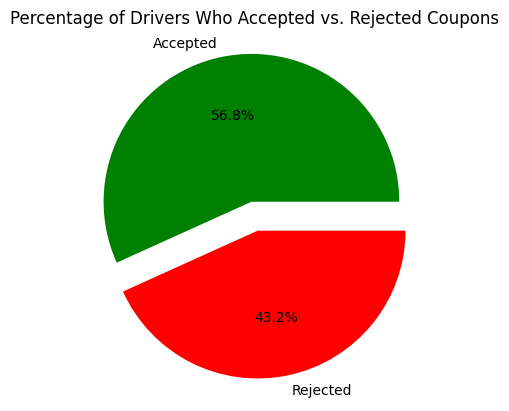

,count
Y,
1,7157
0,5453


In [20]:
#Ploting using pie chart
data_cleaned['Y'].value_counts().plot(kind='pie', explode=[0.1,0.1], autopct='%1.1f%%',colors=['g','r'],labels=['Accepted', 'Rejected'],ylabel='')
plt.title('Percentage of Drivers Who Accepted vs. Rejected Coupons')
plt.show()

data_cleaned['Y'].value_counts()

**5. Use a bar plot to visualize the `coupon` column.**




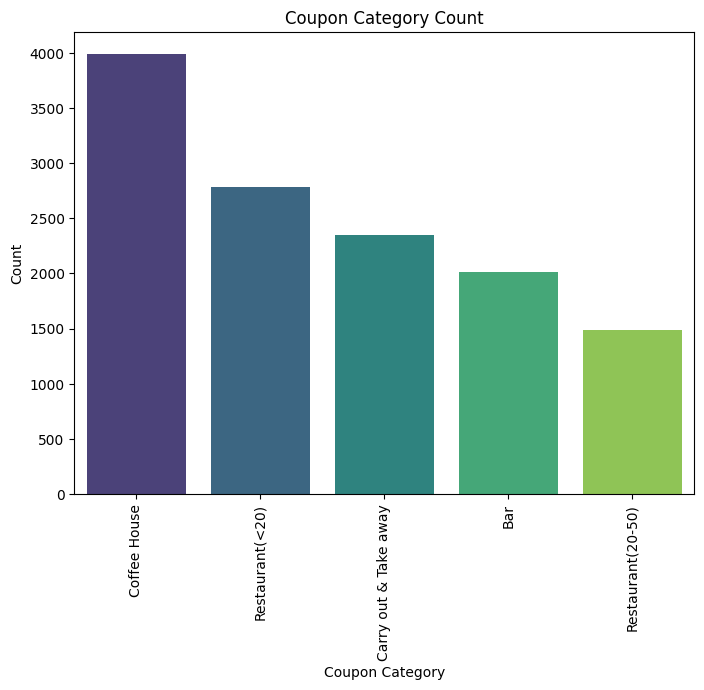

In [21]:
coupon_counts = data_cleaned['coupon'].value_counts().reset_index()
coupon_counts.columns = ['coupon', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(
    data=coupon_counts,
    x='coupon',
    y='count',
    hue='coupon',  # Use the x variable as hue to enable coloring
    dodge=False,   # Prevent bar separation
    palette="viridis"  # Use a color palette
)
plt.title('Coupon Category Count')
plt.xlabel('Coupon Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**6. Use a histogram to visualize the temperature column.**

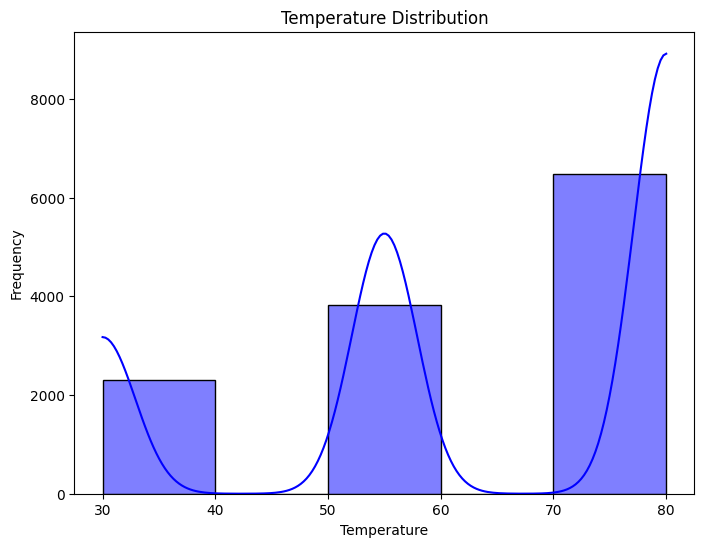

In [22]:
# Plot a histogram of the temperature column
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['temperature'], bins=5, kde=True, color='blue')

# Add labels and title
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

**1. Create a new `DataFrame` that contains just the bar coupons.**


In [23]:
data_bar_coupons = data_cleaned[data_cleaned['coupon'] == 'Bar']

**2. What proportion of bar coupons were accepted?**


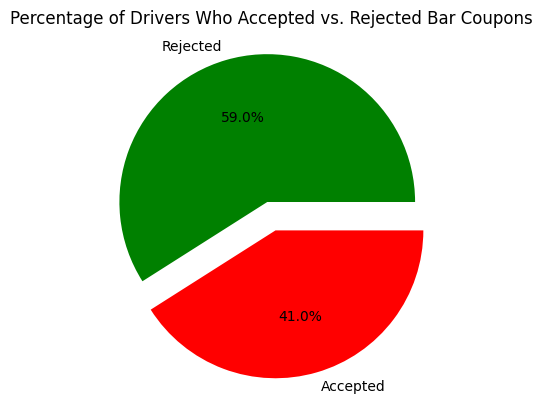

,count
Y,
0,1186
1,824


In [24]:
data_bar_coupons['Y'].value_counts().plot(kind='pie', explode=[0.1,0.1], autopct='%1.1f%%',colors=['g','r'],labels=['Rejected', 'Accepted'],ylabel='')
plt.title('Percentage of Drivers Who Accepted vs. Rejected Bar Coupons')
plt.show()

data_bar_coupons['Y'].value_counts()

**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


**Inference**

Bar coupon acceptance rate is high among the drivers who visits bar more than 3 times a month.

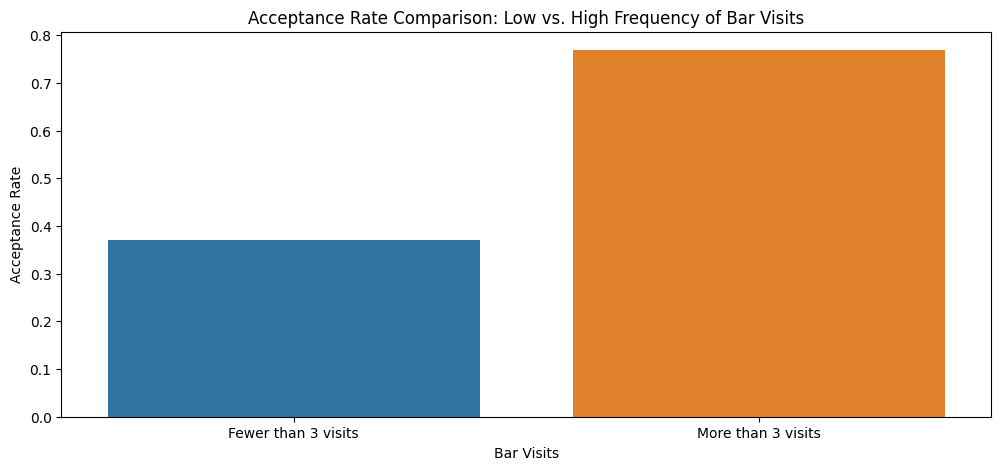

,1
group_by_bar_visit,
Fewer than 3 visits,37.04
More than 3 visits,76.88


In [25]:
# Create a new column group to calculate acceptance rate between people who are going to bar 1 to 3 times and more than 3 times
data_bar_coupons_copy = data_bar_coupons.copy()
data_bar_coupons_copy.loc[:, 'group_by_bar_visit'] = data_bar_coupons_copy['Bar'].apply(lambda x: 'More than 3 visits' if (x  in ['4~8', 'gt8']) else 'Fewer than 3 visits' if ( x in ['1~3','less1' ,'never']) else None)


# Calculate the acceptance rate of each group.
acceptance_rate = data_bar_coupons_copy.groupby('group_by_bar_visit')['Y'].mean().reset_index()
plt.figure(figsize=(12,5))

plt.title('Acceptance Rate Comparison: Low vs. High Frequency of Bar Visits')
sns.barplot(data=acceptance_rate, x='group_by_bar_visit', y='Y', hue='group_by_bar_visit')
plt.xlabel('Bar Visits')  # Set the label for the x-axis
plt.ylabel('Acceptance Rate')  # Set the label for the y-axis
plt.show()

cross_tab_percentage = pd.crosstab([data_bar_coupons_copy['Y']],data_bar_coupons_copy['group_by_bar_visit'], normalize='columns')*100
cross_tab_percentage = cross_tab_percentage.round(2)
cross_tab_percentage.loc[1,:]

**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


**Inference**

Bar coupon acceptance rate is high among the drivers who visits bar more than 1 and age over 25.

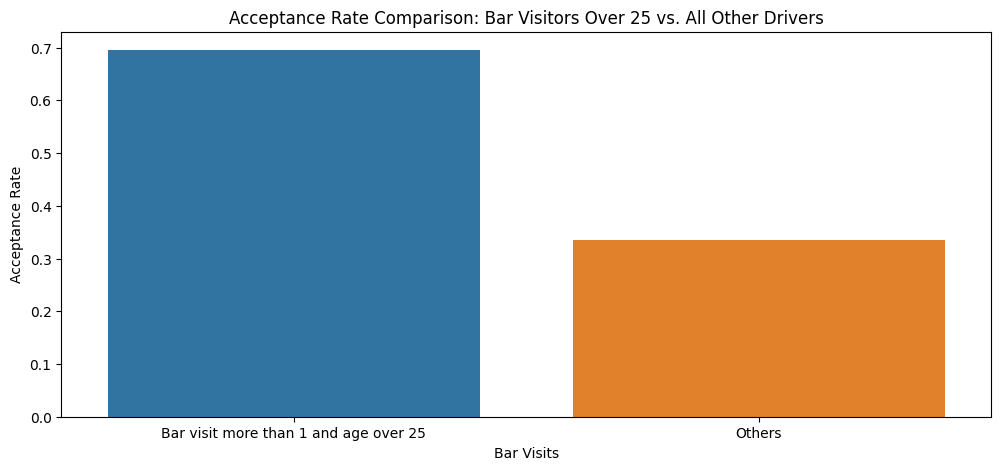

,1
group_by_bar_visit,
Bar visit more than 1 and age over 25,69.52
Others,33.46


In [26]:
# Create a new column group to calculate acceptance rate between people who are going to bar 1 to 3 times and more than 3 times
data_bar_coupons_copy = data_bar_coupons.copy()
data_bar_coupons_copy.loc[:, 'group_by_bar_visit'] = data_bar_coupons_copy.apply(lambda x: 'Bar visit more than 1 and age over 25' if (x['Bar'] in ['1~3','4~8','gt8'] and x['age'] > 25) else 'Others', axis=1)
data_bar_coupons_copy.head()

# Calculate the acceptance rate of each group.
acceptance_rate = data_bar_coupons_copy.groupby('group_by_bar_visit')['Y'].mean().reset_index()
plt.figure(figsize=(12,5))

plt.title('Acceptance Rate Comparison: Bar Visitors Over 25 vs. All Other Drivers')

sns.barplot(data=acceptance_rate, x='group_by_bar_visit', y='Y', hue='group_by_bar_visit')

plt.xlabel('Bar Visits')  # Set the label for the x-axis
plt.ylabel('Acceptance Rate')  # Set the label for the y-axis
plt.show()

cross_tab_percentage = pd.crosstab([data_bar_coupons_copy['Y']],data_bar_coupons_copy['group_by_bar_visit'], normalize='columns')*100
cross_tab_percentage = cross_tab_percentage.round(2)
cross_tab_percentage.loc[1,:]

**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


**Inference**

Bar coupon acceptance rate is high among the drivers who visits bar more than once a month with no kid passanger & non farming occupation

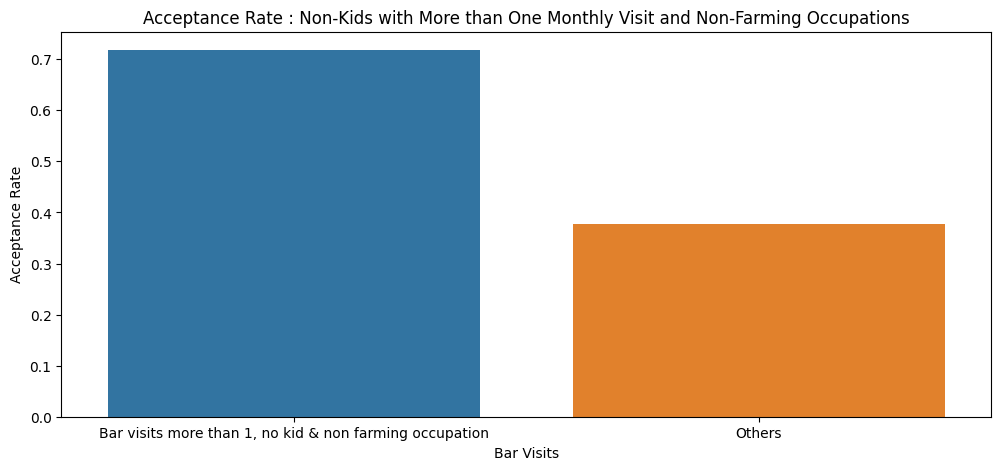

,1
group_by_bar_visit,
"Bar visits more than 1, no kid & non farming occupation",71.79
Others,37.69


In [27]:
# Create a new column group to calculate acceptance rate between people who are going to bar 1 to 3 times and more than 3 times
data_bar_coupons_copy = data_bar_coupons.copy()

data_bar_coupons_copy.loc[:, 'group_by_bar_visit'] = data_bar_coupons_copy.apply(lambda x: 'Bar visits more than 1, no kid & non farming occupation' if (x['Bar'] in ['1~3','4~8','gt8'] and x['passanger'] in ['Friend(s)', 'Partner'] and x['occupation'] != 'Farming Fishing & Forestry') else 'Others', axis=1)

# Calculate the acceptance rate of each group.
acceptance_rate = data_bar_coupons_copy.groupby('group_by_bar_visit')['Y'].mean().reset_index()
plt.figure(figsize=(12,5))

plt.title('Acceptance Rate : Non-Kids with More than One Monthly Visit and Non-Farming Occupations')

sns.barplot(data=acceptance_rate, x='group_by_bar_visit', y='Y', hue='group_by_bar_visit')

plt.xlabel('Bar Visits')  # Set the label for the x-axis
plt.ylabel('Acceptance Rate')  # Set the label for the y-axis
plt.show()

cross_tab_percentage = pd.crosstab([data_bar_coupons_copy['Y']],data_bar_coupons_copy['group_by_bar_visit'], normalize='columns')*100
cross_tab_percentage = cross_tab_percentage.round(2)
cross_tab_percentage.loc[1,:]

**6. Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



**Inference**

Bar coupon acceptance rate is high among the drivers who visits bar with no kid passanger or under 30 or low income or visits cheaper restaurants

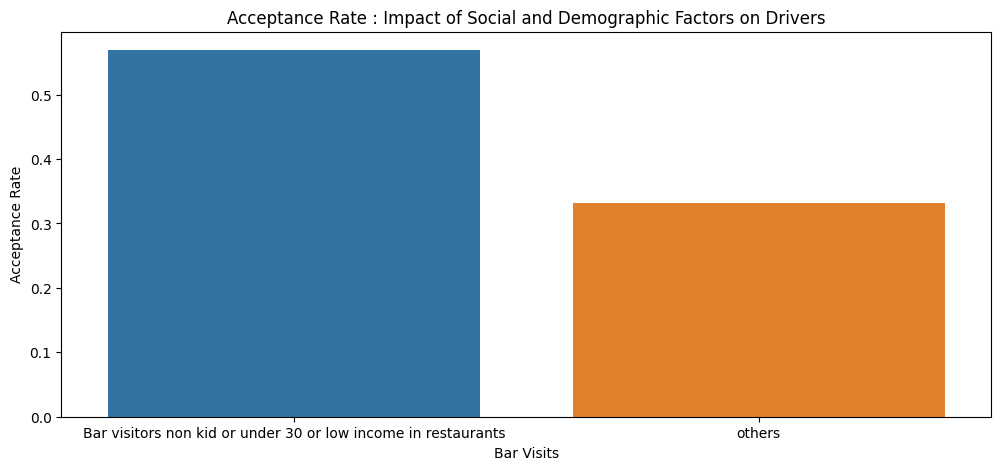

,1
group_by_bar_visit,
Bar visitors non kid or under 30 or low income in restaurants,56.93
others,33.14


In [28]:
# Create a new column group to calculate acceptance rate between people who are going to bar 1 to 3 times and more than 3 times
data_bar_coupons_copy = data_bar_coupons.copy()

data_bar_coupons_copy.loc[:, 'group_by_bar_visit'] = data_bar_coupons_copy.apply(lambda x: 'Bar visitors non kid or under 30 or low income in restaurants' if ((((x['Bar'] in ['1~3','4~8','gt8']) and (x['passanger'] in ['Friend(s)', 'Partner']) and (x['maritalStatus'] != 'Widowed')) or
                                                                                                                                                               ((x['Bar'] in ['1~3','4~8','gt8']) and (x['age'] < 30)) or
                                                                                                                                                               ((x['RestaurantLessThan20'] in ['4~8','gt8']) and (x['income_numeric'] < 50000))))
                                                                                                                                                          else 'others', axis=1)
# Calculate the acceptance rate of each group.
acceptance_rate = data_bar_coupons_copy.groupby('group_by_bar_visit')['Y'].mean().reset_index()
plt.figure(figsize=(12,5))

plt.title('Acceptance Rate : Impact of Social and Demographic Factors on Drivers')

sns.barplot(data=acceptance_rate, x='group_by_bar_visit', y='Y', hue='group_by_bar_visit')

plt.xlabel('Bar Visits')  # Set the label for the x-axis
plt.ylabel('Acceptance Rate')  # Set the label for the y-axis
plt.show()

cross_tab_percentage = pd.crosstab([data_bar_coupons_copy['Y']],data_bar_coupons_copy['group_by_bar_visit'], normalize='columns')*100
cross_tab_percentage = cross_tab_percentage.round(2)
cross_tab_percentage.loc[1,:]


**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

**>>Based on the observations, the following hypotheses can be formulated about drivers who accepted the bar coupons:**

**Frequency of Bar Visits:**

Drivers who visit bars more frequently (more than 3 times a month) are more likely to accept bar coupons compared to those who visit bars less frequently (3 or fewer times a month).

**Demographics:**

Drivers over the age of 25 who visit bars more than once a month are more likely to accept bar coupons compared to younger or less frequent bar-goers.
Younger drivers (under 30) who frequent bars more than once a month may also show a higher acceptance rate, suggesting a generational or lifestyle factor.

**Passenger Influence:**

Having adult passengers (as opposed to children) increases the likelihood of bar coupon acceptance, possibly due to socializing behaviors or shared interest in bar visits.

**Occupational Impact:**

Drivers with occupations outside of farming, fishing, or forestry are more likely to accept bar coupons. This might relate to lifestyle differences or proximity to urban areas where bars are more common.

**Marital Status:**

Drivers who are not widowed and frequently visit bars are more likely to accept bar coupons, possibly due to differences in social habits or openness to promotions.

**Restaurant Habits and Income:**

Drivers who frequently (more than 4 times a month) visit cheap restaurants and have an income below $50,000 are more likely to accept bar coupons. This suggests that individuals with budget-conscious spending patterns and lower income are more responsive to discounts or promotions.

**>>Drivers with a lower acceptance rate for bar coupons exhibit the following characteristics:**

**Low Frequency of Bar Visits:**

Drivers who go to a bar 3 or fewer times a month are less likely to accept bar coupons. This suggests that their lifestyle or preferences are not aligned with bar-going activities, making them less interested in related promotions.

**Age Factor:**

Drivers who are 25 years old or younger (and do not meet the other criteria for high acceptance) may show less interest in bar coupons. They may prioritize other social activities or lack financial independence to spend on bars.

**Passenger Type:**

Drivers who typically travel with children as passengers are less likely to accept bar coupons. This could indicate family-oriented individuals who are less inclined toward bar visits due to their responsibilities or lifestyle.

**Occupational Profile:**

Drivers involved in farming, fishing, or forestry occupations are less likely to accept bar coupons. These occupations might be associated with rural areas where bars are less accessible, or these individuals may have a cultural preference against frequent bar visits.

**Marital Status:**

Drivers who are widowed tend to have a lower acceptance rate for bar coupons. This could reflect a reduced inclination toward social outings like bar visits.

**Income and Dining Patterns:**

Drivers who go to cheap restaurants fewer than 4 times a month and have an income above $50,000 are less likely to accept bar coupons. This group might have other dining preferences, prioritize more expensive or exclusive venues, or simply not be responsive to promotional offers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## **Investigating Coffee House Coupons**

**1. Create a new DataFrame that contains just the coffee house coupons.**



In [29]:
data_coffee_house_coupons = data_cleaned[data_cleaned['coupon'] == 'Coffee House']

**2. What proportion of bar coupons were accepted?**

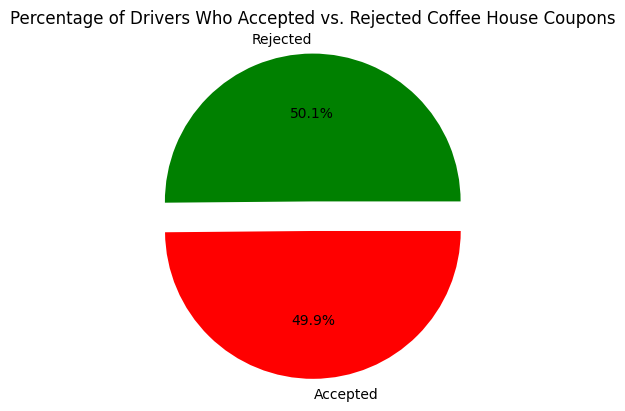

In [30]:
data_coffee_house_coupons['Y'].value_counts().plot(kind='pie', explode=[0.1,0.1], autopct='%1.1f%%',colors=['g','r'],labels=['Rejected', 'Accepted'],ylabel='')
plt.title('Percentage of Drivers Who Accepted vs. Rejected Coffee House Coupons')
plt.show()



*   Printing dataframe info

**3. Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more**

**Inference**

Coffee house coupon acceptance rate is high among the drivers who visits Coffee House more than 3 times a month to those who went fewer.

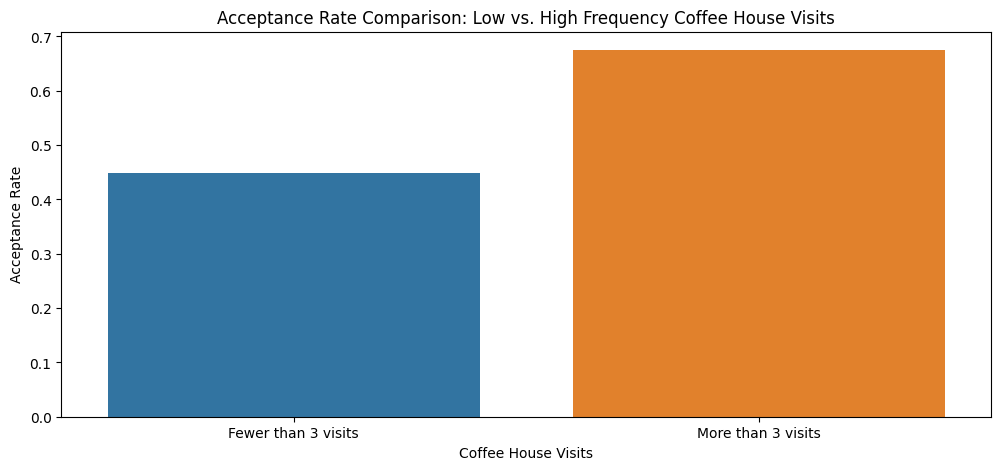

,1
group_by_coffee_house_visit,
Fewer than 3 visits,44.85
More than 3 visits,67.50


In [31]:
#Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

data_coffee_house_coupons_copy = data_coffee_house_coupons.copy()
data_coffee_house_coupons_copy.loc[:, 'group_by_coffee_house_visit'] = data_coffee_house_coupons_copy['CoffeeHouse'].apply(lambda x: 'More than 3 visits' if (x  in ['4~8', 'gt8']) else 'Fewer than 3 visits' if ( x in ['1~3','less1' ,'never']) else None)


# Calculate the acceptance rate of each group.
acceptance_rate = data_coffee_house_coupons_copy.groupby('group_by_coffee_house_visit')['Y'].mean().reset_index()
plt.figure(figsize=(12,5))

plt.title('Acceptance Rate Comparison: Low vs. High Frequency Coffee House Visits')
sns.barplot(data=acceptance_rate, x='group_by_coffee_house_visit', y='Y', hue='group_by_coffee_house_visit')
plt.xlabel('Coffee House Visits')  # Set the label for the x-axis
plt.ylabel('Acceptance Rate')  # Set the label for the y-axis
plt.show()

cross_tab_percentage = pd.crosstab([data_coffee_house_coupons_copy['Y']],data_coffee_house_coupons_copy['group_by_coffee_house_visit'], normalize='columns')*100
cross_tab_percentage = cross_tab_percentage.round(2)
cross_tab_percentage.loc[1,:]

**4. Compare the acceptance rate between those who have age less than or equal to 20 and a student vs. Others**



**Inference**

Coffee house coupon acceptance rate is high among the students whose age is less than or equal to 20.

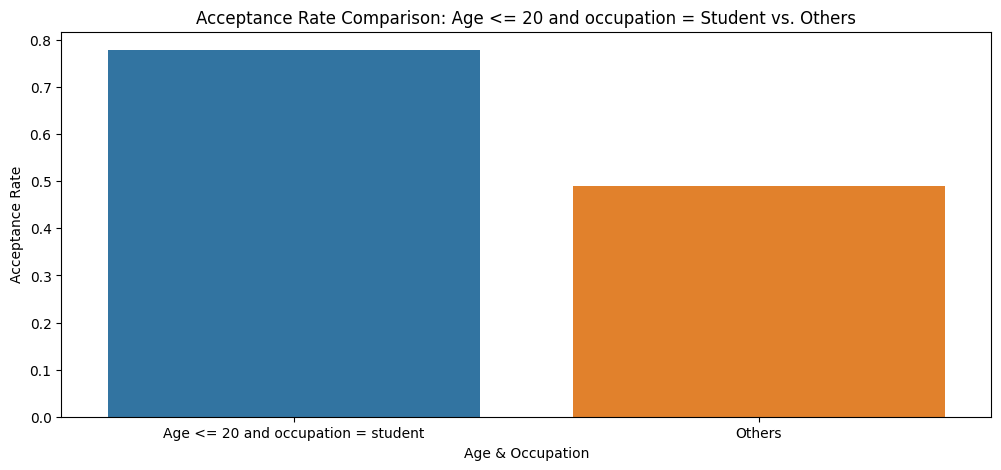

,1
group_by_age,
Age <= 20 and occupation = student,77.86
Others,48.91


In [32]:
# age below 25 and occupation = Student, and others
# Create a new column group to calculate acceptance rate between people who are going to bar 1 to 3 times and more than 3 times
data_coffee_house_coupons_copy = data_coffee_house_coupons.copy()
data_coffee_house_coupons_copy.loc[:, 'group_by_age'] = data_coffee_house_coupons_copy.apply(lambda x: 'Age <= 20 and occupation = student' if ( (x['age'] <= 20) and (x['occupation'] == 'Student')) else 'Others', axis=1)

# Calculate the acceptance rate of each group.
acceptance_rate = data_coffee_house_coupons_copy.groupby('group_by_age')['Y'].mean().reset_index()
plt.figure(figsize=(12,5))

plt.title('Acceptance Rate Comparison: Age <= 20 and occupation = Student vs. Others')
sns.barplot(data=acceptance_rate, x='group_by_age', y='Y', hue='group_by_age')
plt.xlabel('Age & Occupation')  # Set the label for the x-axis
plt.ylabel('Acceptance Rate')  # Set the label for the y-axis
plt.show()

cross_tab_percentage = pd.crosstab([data_coffee_house_coupons_copy['Y']],data_coffee_house_coupons_copy['group_by_age'], normalize='columns')*100
cross_tab_percentage = cross_tab_percentage.round(2)
cross_tab_percentage.loc[1,:]

**5. Compare the acceptance rate based on the income**

**Inference**

Coffee house coupon acceptance rate is high among the low income groups. Violin plot is wider for the income range 20K to 60K for those who accepted coupon.

In barchart, coupon acceptance rate is high among low income group.

Text(0, 0.5, 'Acceptance Rate')

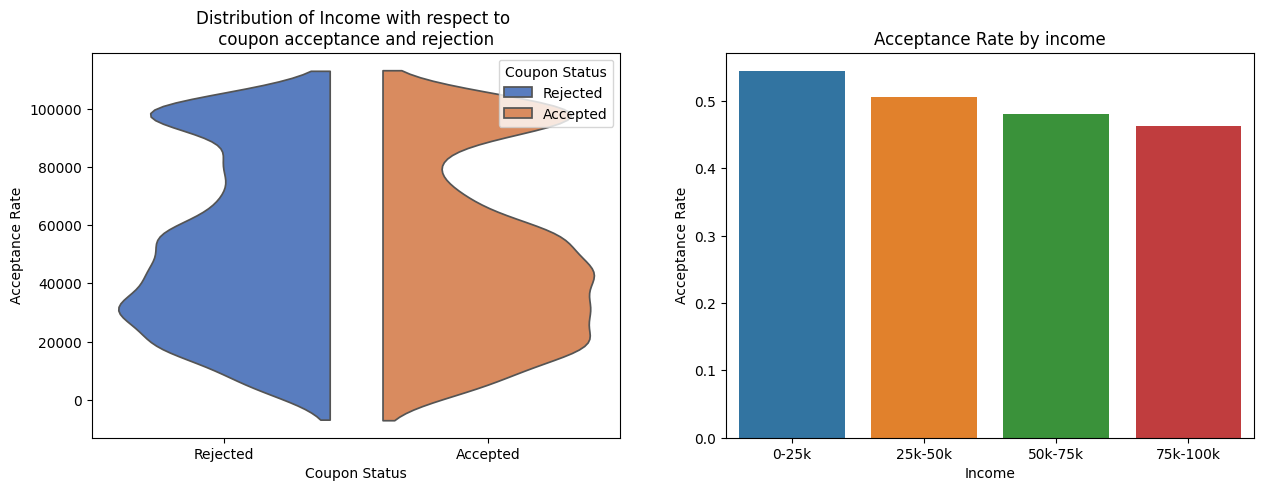

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(121)
ax = sns.violinplot(data=data_coffee_house_coupons, x='Y', y='income_numeric', hue='Y', split=True, inner=None, palette='muted')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Rejected', 'Accepted'])
plt.title('Distribution of Income with respect to \n coupon acceptance and rejection ')
plt.xlabel('Coupon Status')
plt.ylabel('Acceptance Rate')
plt.legend(title='Coupon Status', loc = 'best', labels=['Rejected', 'Accepted'])  # Name the legend

bins = [0, 25000, 50000, 75000, 100000]
labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k']

data_coffee_house_coupons_copy = data_coffee_house_coupons.copy()
data_coffee_house_coupons_copy['income_group'] = pd.cut(data_coffee_house_coupons_copy['income_numeric'], bins=bins, labels=labels, right=True)
acceptance_rate = data_coffee_house_coupons_copy.groupby('income_group', observed=True)['Y'].mean().reset_index()

plt.subplot(122)
plt.title('Acceptance Rate by income')
sns.barplot(data=acceptance_rate, x='income_group', y='Y', hue='income_group')
plt.xlabel('Income')  # Set the label for the x-axis
plt.ylabel('Acceptance Rate')  # Set the label for the y-axis

**6. Compare the acceptance rate based on occupation (Unemployed vs Others)**

**Inference**

Coffee house coupon acceptance rate is high among unemployed people.

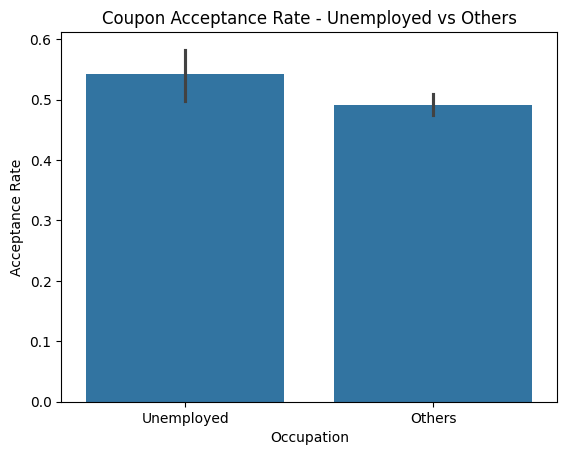

  group_by_occupation         Y
0              Others  0.491372
1          Unemployed  0.542105


In [34]:
data_coffee_house_coupons_copy = data_coffee_house_coupons.copy()
data_coffee_house_coupons_copy.loc[:, 'group_by_occupation'] = data_coffee_house_coupons_copy['occupation'].apply(lambda x: 'Unemployed' if (x  == 'Unemployed') else 'Others')
acceptance_rate = data_coffee_house_coupons_copy.groupby('group_by_occupation')['Y'].mean().reset_index()

sns.barplot(
    data=data_coffee_house_coupons_copy,
    x='group_by_occupation',
    y='Y',
    dodge=True)

plt.title('Coupon Acceptance Rate - Unemployed vs Others')
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.show()

print(acceptance_rate)

**7. Show the impact of coupon acceptance rate for various factors such as destination, temperature, weather and time.**

**Inference**

Coffee house coupon acceptance rate is high when :

    1. the driving to a non urgent place
    2. temperature is 80
    3. weather is rainy or sunny
    4. time is 10 AM.
    5. driving direction is same as the coffee house direction

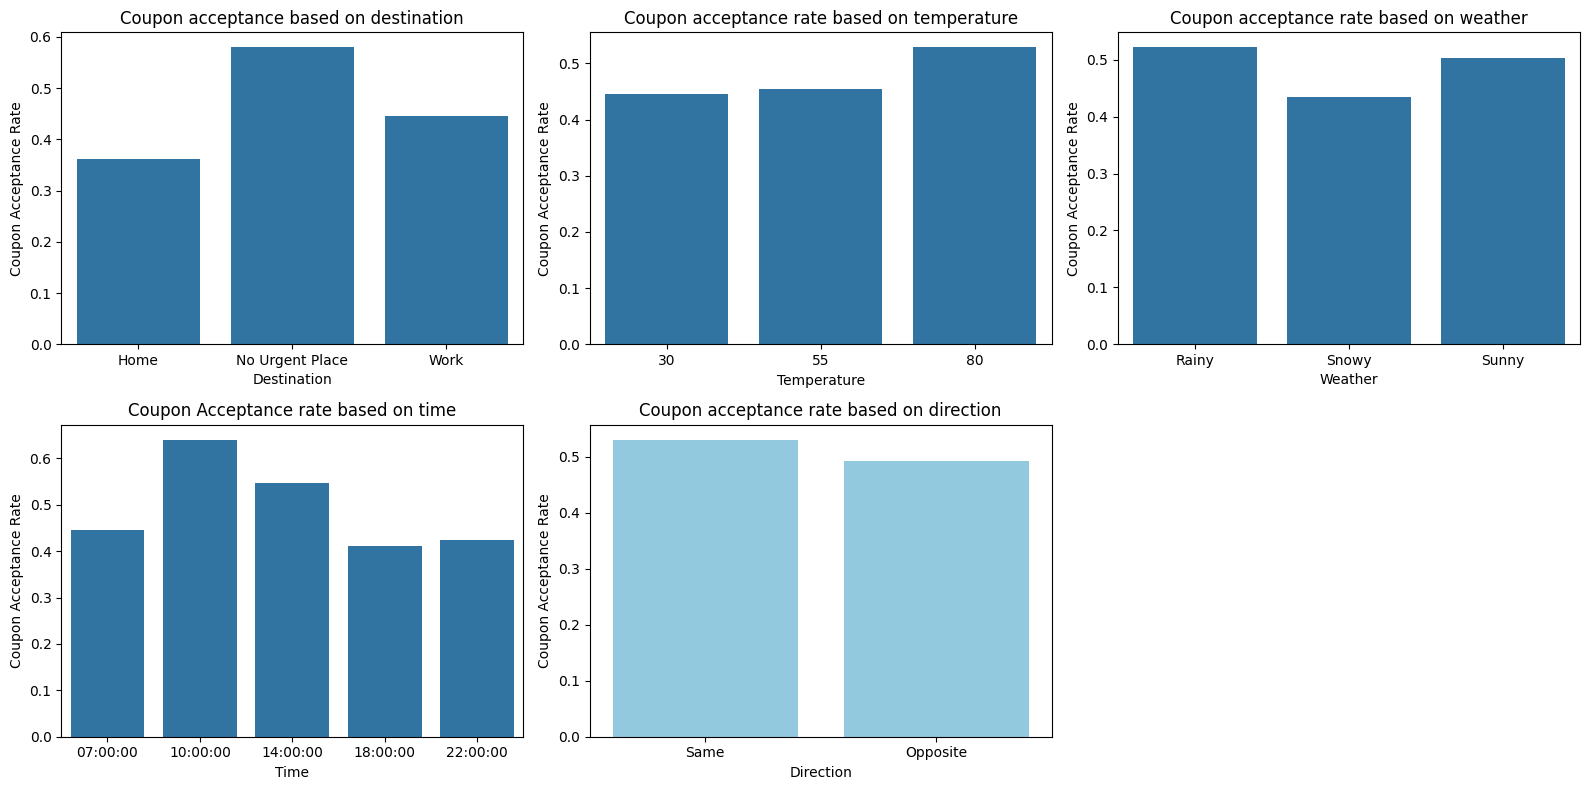

In [35]:
# Plot a histogram of the based on destination groupby
data_groupby_destination = data_coffee_house_coupons.groupby(['destination'])['Y'].mean().reset_index()
plt.figure(figsize=(16, 8))
plt.subplot(231)
sns.barplot(
    data=data_groupby_destination,
    x='destination',
    y='Y',
    dodge=True,
)
# Add labels and title
plt.title('Coupon acceptance based on destination')
plt.xlabel('Destination')
plt.ylabel('Coupon Acceptance Rate')

plt.subplot(232)
# Plot a histogram of the based on temperature groupby
data_groupby_destination = data_coffee_house_coupons.groupby(['temperature'])['Y'].mean().reset_index()
sns.barplot(
    data=data_groupby_destination,
    x='temperature',
    y='Y',
    dodge=True,
)
# Add labels and title
plt.title('Coupon acceptance rate based on temperature')
plt.xlabel('Temperature')
plt.ylabel('Coupon Acceptance Rate')

plt.subplot(233)
# Plot a histogram of the based on weather groupby
data_groupby_destination = data_coffee_house_coupons.groupby(['weather'])['Y'].mean().reset_index()
sns.barplot(
    data=data_groupby_destination,
    x='weather',
    y='Y',
    dodge=True,
)
# Add labels and title
plt.title('Coupon acceptance rate based on weather')
plt.xlabel('Weather')
plt.ylabel('Coupon Acceptance Rate')

plt.subplot(234)
# Plot a histogram of the based on time groupby
data_groupby_destination = data_coffee_house_coupons.groupby(['time'])['Y'].mean().reset_index()
sns.barplot(
    data=data_groupby_destination,
    x='time',
    y='Y',
    dodge=True,
)
# Add labels and title
plt.title('Coupon Acceptance rate based on time')
plt.xlabel('Time')
plt.ylabel('Coupon Acceptance Rate')

plt.subplot(235)
data_groupby_direction = data_coffee_house_coupons.groupby('direction_opp')['Y'].mean().reset_index()
ax = sns.barplot(data=data_groupby_direction, x='direction_opp', y='Y', color='skyblue')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Same', 'Opposite'])
plt.title('Coupon acceptance rate based on direction')
plt.xlabel('Direction')
plt.ylabel('Coupon Acceptance Rate')

plt.tight_layout()
# Show the plot
plt.show()

**8. Based on these observations, what do you hypothesize about drivers who accepted the Coffee House coupons?**

**>>Based on the provided observations, the following hypotheses can be formulated about drivers who accepted the Coffee House coupons:**

**Frequency of Coffee House Visits:**

Drivers who visit coffee houses more frequently (more than 3 times a month) are more likely to accept coffee house coupons, indicating a strong preference or habitual behavior for coffee consumption.

**Demographics:**

**1. Young Age and Student Status:**

Drivers aged 20 or younger, particularly students, are more likely to accept coffee house coupons. This suggests that younger individuals, who often associate coffee houses with socializing or studying, are more responsive to such promotions.

**2. Income:**

Drivers in the low-income range (20K–60K) show a higher acceptance rate for coffee house coupons. This may reflect price sensitivity, where discounts make coffee house visits more affordable.

**3. Employment Status:**

Unemployed individuals are more likely to accept coffee house coupons. This could be due to financial constraints, making discounts appealing, or more flexible schedules allowing them to visit coffee houses more frequently.

**4. Situational Factors:**

Drivers are more likely to accept coffee house coupons when:

**Driving to a non-urgent destination:** This suggests that they are more open to spontaneous stops for leisure or refreshment.
**Weather conditions are favorable (rainy or sunny):** These conditions may encourage stops at coffee houses for comfort or relaxation.

**Temperature is 80°F:** This temperature might be perceived as ideal for enjoying a coffee stop.

**Time is 10 AM:** This aligns with morning coffee consumption habits, a common time for coffee breaks.
Driving direction aligns with the coffee house location: Convenience plays a role in coupon acceptance, as drivers are more likely to consider stopping when the coffee house is on their route.

**Drivers with a lower acceptance rate for Coffee House coupons exhibit the following characteristics:**

**1. Low Frequency of Coffee House Visits:**

Drivers who visit coffee houses 3 or fewer times a month are less likely to accept coupons. This indicates that these drivers are not habitual coffee house visitors and may lack the interest or routine that aligns with such promotions.

**2. Demographics:**

**Older Drivers:**

Drivers over the age of 20 who are not students are less likely to accept coffee house coupons. This group may have different preferences for beverages, dining locations, or social habits.

**Higher-Income Groups:**

Drivers with incomes above 60K are less likely to accept coffee house coupons. They may prefer premium coffee options or establishments where coupons are not a significant factor in decision-making.

**3. Employment Status:**

Employed Individuals:
Drivers with regular employment are less likely to accept coffee house coupons, potentially due to a lack of time for spontaneous coffee stops or different patterns of coffee consumption (e.g., office coffee).

**4. Situational Factors:**

Drivers are less likely to accept coffee house coupons in situations where:

**Driving to an urgent destination:** These drivers are focused on reaching their destination and are less open to stopping for coffee.

**Inconvenient driving direction:** When the coffee house is not aligned with their driving route, the lack of convenience reduces acceptance.

**Less favorable weather conditions:** Extreme weather (e.g., too hot, too cold, or stormy) might discourage stopping for coffee.

**Outside typical coffee consumption hours:** Drivers may be less inclined to accept coupons at times other than morning hours, such as late afternoon or evening.